In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [10]:
# filter for the job titles and country
df_IND = df[(df['job_country'] == 'India')].dropna(subset=['salary_year_avg'])


In [11]:
job_titles = df_IND['job_title_short'].value_counts().index[:5].tolist()

# filter the df for the top 6 job titles
df_IND_top5 = df_IND[df_IND['job_title_short'].isin(job_titles)]

# order the job titles by median salary
job_order = df_IND_top5.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

job_order

Index(['Data Engineer', 'Senior Data Engineer', 'Data Scientist',
       'Data Analyst', 'Machine Learning Engineer'],
      dtype='object', name='job_title_short')

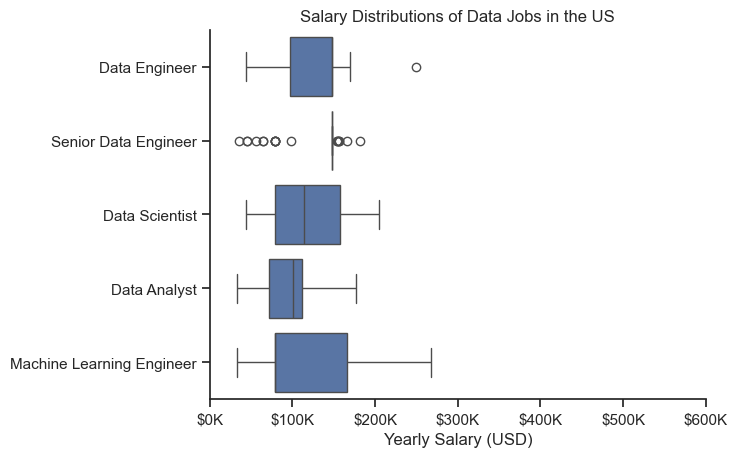

In [14]:
sns.boxplot(data=df_IND_top5, x='salary_year_avg', y='job_title_short', order=job_order,whis=2)
sns.set_theme(style='ticks')
sns.despine()

# this is all the same
plt.title('Salary Distributions of Data Jobs in the US')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0, 600000) 
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()